# Processing Images and Videos - Exercises
## Computer Vision and Image Processing - Lab Session 3
### Prof: Luigi Di Stefano, luigi.distefano@unibo.it
### Tutor: Alex Costanzino, alex.costanzino@unibo.it - Iacopo Curti, iacopo.curti2@unibo.it

## Exercise 1: Linear Contrast Stretching
Implement a linear contrast stretching function.

Given $P_{max}$ and $P_{min}$ the maximum and minimum pixel value respectively (can be different from the min and max values of the image), convert each pixel of the original image $P_{in}$ into the new pixel of the output image $P_{out}$ with the following formula:

$P_{out} = \frac{255}{P_{max} - P_{min}}(P_{in} - P_{min})$

Test the function 3 times on the __grayscale__ image "ex/image.png" using as $P_{max}$ and $P_{min}$:

* The minimum and maximum value of the image  respectively. You can use **np.max(array, axis)** and **np.min(array, axis)** to calculate them. 
* $P_{max}=40$ and $P_{min}=0$.
* Choose as $P_{max}$ and $P_{min}$ the values at 95% and 5% percentiles of the distribution respectively (the value of the 5% pixels ordered from the lowest value pixel). 

Plot the histogram of the image before and after each transformation.

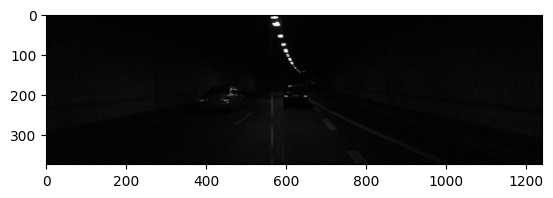

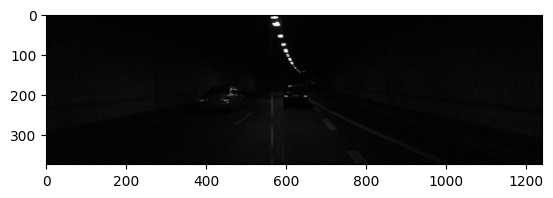

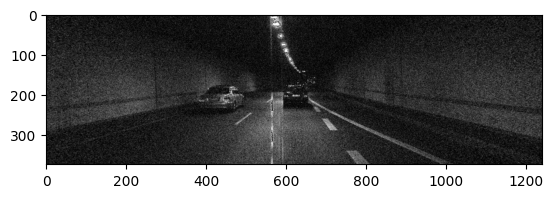

1.0 14.0


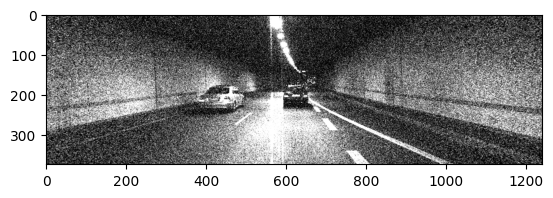

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def linear_contrast_stretching(img, Pmin, Pmax):
    stretched = img.copy()
    stretched = 255//(Pmax - Pmin) * (stretched - Pmin)
    stretched = np.clip(stretched, 0, 255) # per aggiustare i valori fuori dall'intervallo
    return stretched


img = cv2.imread("ex/image.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

img2 = linear_contrast_stretching(img, np.min(img), np.max(img))
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)
plt.show()

img3 = linear_contrast_stretching(img, 0, 40)
plt.imshow(img3, cmap='gray', vmin=0, vmax=255)
plt.show()

Pmin, Pmax = np.percentile(img, (5, 95))
print(Pmin, Pmax)
img4 = linear_contrast_stretching(img, Pmin, Pmax)
plt.imshow(img4, cmap='gray', vmin=0, vmax=255)
plt.show()

## Exercise 2: Other Filters
Apply a denoising filter and an high-pass filter (edge-enhancement) to an image.

* Denoising filter = $\begin{bmatrix} 
                        1 & 2 & 1\\
                        2 & 4 & 2\\
                        1 & 2 & 1\\
                        \end{bmatrix}\frac{1}{16} $

* High pass filter (edge-enhancement) = $\begin{bmatrix} 
                        0 & 1 & 0\\
                        1 & -4 & 1\\
                        0 & 1 & 0\\
                        \end{bmatrix}$

Test it on the __grayscale__ image "ex/landscape.jpg".

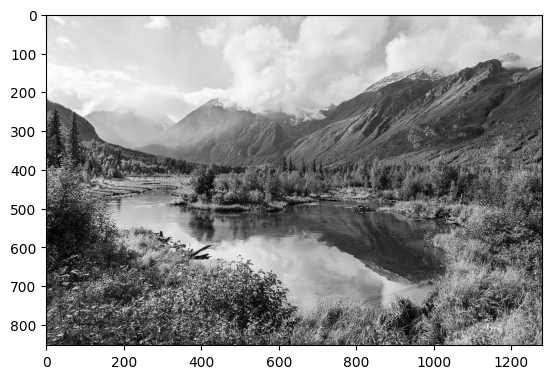

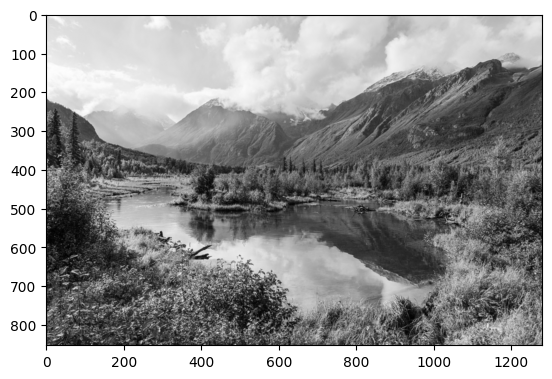

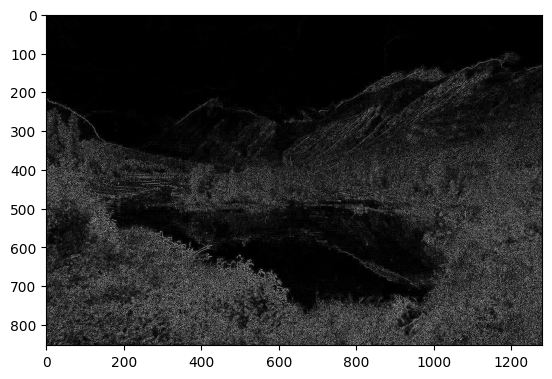

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import time

# Reading the image
img = cv2.imread("ex/landscape.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap='gray',vmin=0,vmax=255)
plt.show()

denoising_filter = np.array([[1, 2, 1],
                             [2, 4, 2],
                             [1, 2, 1]]) / 16
img_denoised = cv2.filter2D(img,-1,denoising_filter)
plt.imshow(img_denoised,cmap='gray',vmin=0,vmax=255)
plt.show()

edge_enhancement_filter = np.array([[0, 1, 0],
                                    [1, -4, 1],
                                    [0, 1, 0]])
img_edge_enhanced = cv2.filter2D(img,-1,edge_enhancement_filter)
plt.imshow(img_edge_enhanced,cmap='gray',vmin=0,vmax=255)
plt.show()

## Exercise 3:  Playing with Filters

Denoise 3 images  ("ex/noise_1.png", "ex/noise_2.png", "ex/noise_3.png"), in the best way that you could, with the sequence of filters that you prefer. Then compute the Peak Signal to Noise Ratio (PSNR) of the original image ("ex/orginal_image.BMP") and the filtered image that you have obtained, in order to compare your results with the ones of your collegues. 

**PSNR formula**: $PSNR = 20log_{10}(\frac{MAX_I}{\sqrt{MSE}})$

- Il PSNR (Peak Signal-to-Noise Ratio) misura quanto rumore è stato introdotto in un segnale (nel nostro caso, un’immagine) rispetto al segnale originale.
    - PSNR dice quanto l’immagine modificata (K) è diversa dall’originale (I).
- Il filtro che rimuove meglio il rumore produrrà un'immagine K che si avvicina meglio all'originale I

where $MSE = \frac{1}{m \, n} \sum_{i=0}^{m-1} \sum_{j=0}^{n-1} [I(i,j) - K(i,j)]^{2}$ and $MAX_I$ is the maximum possible pixel value of the image.

Use the function of OpenCV [`cv2.PSNR(img1, img2)`](https://docs.opencv.org/4.x/d2/de8/group__core__array.html#ga3119e3ea73010a6f810bb05aa36ac8d6) in order to compute the PSNR between img1 and img2.

Your Imagination is the Limit!! Good Luck!!

The students that will get the best results, will receive a **gift**!!



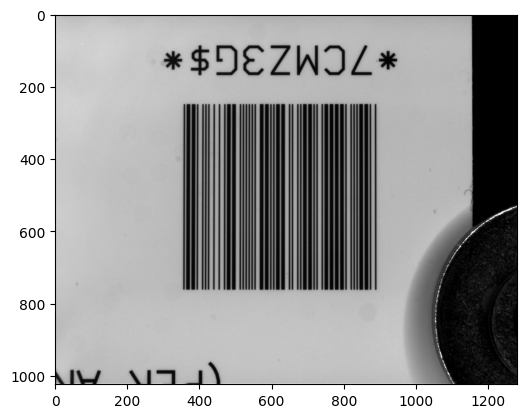

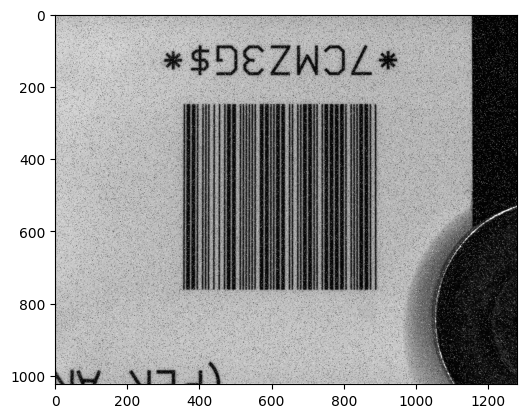

PSNR iniziale: 16.35267998382394


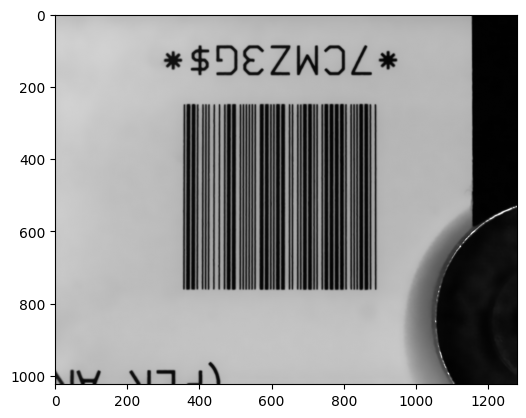

PSNR dopo filtering: 32.68036366831603


In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import time

noiseless_img = cv2.imread("ex/original_image.BMP", cv2.IMREAD_GRAYSCALE)
# plt.figure(figsize=(15, 12))
plt.imshow(noiseless_img, cmap='gray',vmin=0,vmax=255)
plt.show()

# noise 1
# plt.imshow(noiseless_img, cmap='gray',vmin=0,vmax=255)
# plt.show()
# img = cv2.imread("ex/noise_1.png", cv2.IMREAD_GRAYSCALE)
# plt.imshow(img,cmap='gray',vmin=0,vmax=255)
# plt.show()
# print(f"PSNR iniziale: {cv2.PSNR(noiseless_img, img)}")
# sigma_space = 75
# sigma_color = 75
# k_size = 5
# img_denoised = cv2.bilateralFilter(img, k_size, sigma_space, sigma_color)
# plt.imshow(img_denoised,cmap='gray',vmin=0,vmax=255)
# plt.show()
# print(f"PSNR dopo filtering: {cv2.PSNR(noiseless_img, img_denoised)}")

# noise 2
# img = cv2.imread("ex/noise_2.png", cv2.IMREAD_GRAYSCALE)
# plt.figure(figsize=(15, 12))
# plt.imshow(img, cmap='gray',vmin=0,vmax=255)
# plt.show()
# print(f"PSNR iniziale: {cv2.PSNR(noiseless_img, img)}")
# k_size = 3
# img_denoised = cv2.medianBlur(img, k_size)
# plt.imshow(img_denoised,cmap='gray',vmin=0,vmax=255)
# plt.show()
# print(f"PSNR dopo filtering: {cv2.PSNR(noiseless_img, img_denoised)}")

# noise 3
img = cv2.imread("ex/noise_3.png", cv2.IMREAD_GRAYSCALE)
# plt.figure(figsize=(15, 12))
plt.imshow(img, cmap='gray',vmin=0,vmax=255)
plt.show()
print(f"PSNR iniziale: {cv2.PSNR(noiseless_img, img)}")
k_size = 3
img_denoised = cv2.medianBlur(img, k_size)
img_denoised = cv2.fastNlMeansDenoising(img_denoised, h=25, templateWindowSize=7, searchWindowSize=21)
# plt.figure(figsize=(15, 12))
plt.imshow(img_denoised,cmap='gray',vmin=0,vmax=255)
plt.show()
print(f"PSNR dopo filtering: {cv2.PSNR(noiseless_img, img_denoised)}")

## Exercise 4: Exponential Operator

It is sometimes desirable to selectively enhance the contrast in either dark (under-exposed) or bright (over-exposed) areas of the image. Linear stretching, though, would expand the contrast uniformly. However, a non-linear mapping, such as the Exponential Operator, can be deployed:

<img src="LabSession3Images/exp_op.png" width="320">

Thus, taking $r<1$ would stretch the intensity dynamics of dark areas and shrink that of bright ones, which turns out effective to improve under-exposed images. The opposite behaviour is achieved with $r>1$, which therefore can be used to enhance over-exposed images.

The operator is also known as __gamma correction__, due to its widespread use to compensate for the exponential voltage-to-intensity mapping ($I=V^r$) of old CRT monitors (often  $r=2.2$, i.e. darkening), which can be compensated by brightening  the image ($r'=\frac{1}{r}=0.45$) before displaying. 

Given an exponent $r$, $P_{out}$ the output pixel value and $P_{in}$ the input pixel value, the formula for the exponential operator is the following:

$P_{out}=255*(\frac{P_{in}}{255})^r$

Implement an exponential operator using as $r=0.45$.
Test the function on the __grayscale__ image "ex/image.png".
Plot the histogram of the image before and after the transformation.

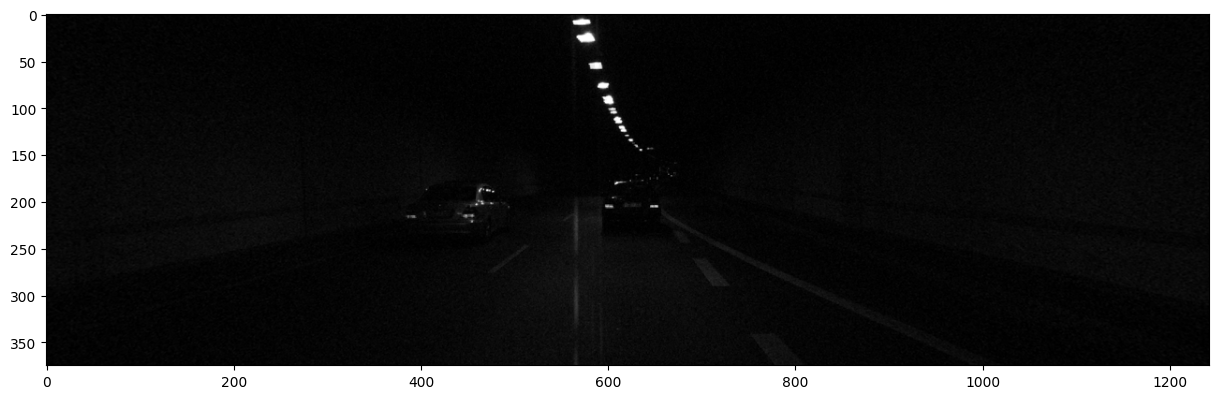

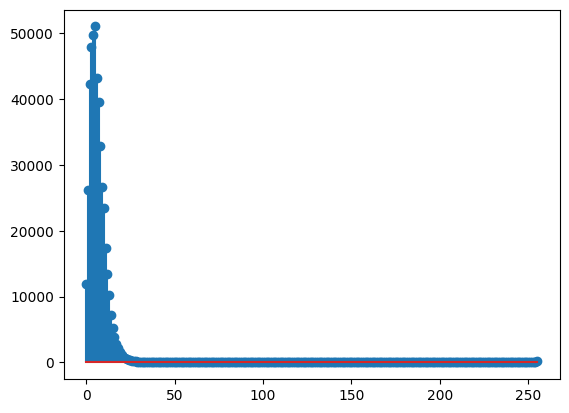

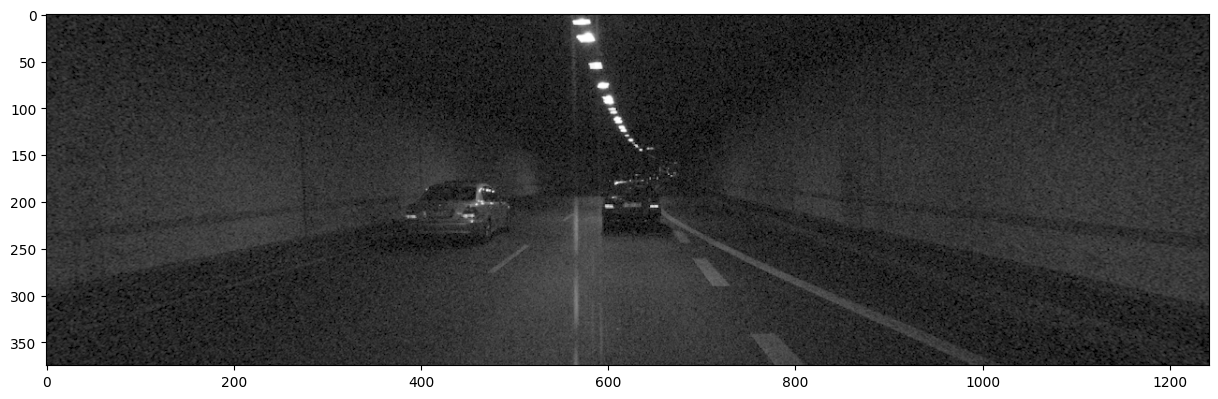

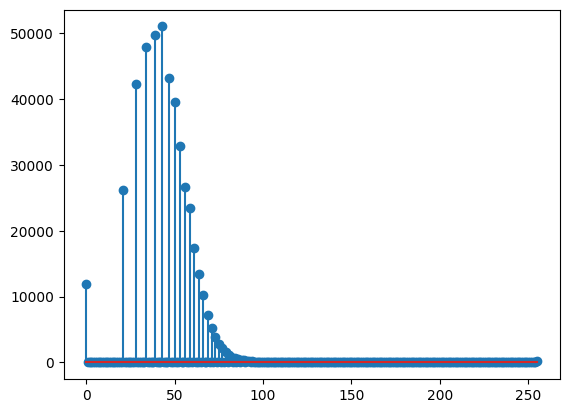

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("ex/image.png", cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(15, 12))
plt.imshow(img, cmap='gray',vmin=0,vmax=255)
plt.show()
hist, _ = np.histogram(img.flatten(), 256, [0,256])
plt.stem(hist)
plt.show()

r = 0.45
new_img = img.copy()
new_img = 255 * ((new_img/255) ** r)
new_img = np.clip(new_img, 0, 255) # per aggiustare i valori fuori dall'intervallo
plt.figure(figsize=(15, 12))
plt.imshow(new_img, cmap='gray',vmin=0,vmax=255)
plt.show()
hist, _ = np.histogram(new_img.flatten(), 256, [0,256])
plt.stem(hist)
plt.show()

## Exercise 5

Apply one or more of the previous operators on each frame of the video with path 'ex/1.avi'.

In [20]:
# Import additional library to properply play videos on jupyter notebook
from IPython.display import clear_output

# Put the code in try-except statements catch the keyboard exception and release the camera device and 
# continue with the rest of code.
def play_video(video_path):
    cap = cv2.VideoCapture(video_path)
    # Try-except statement to manage exceptions
    frame_count=0
    try:
        while(True):
            ret, frame = cap.read()
            frame_count += 1
            if not ret or frame is None:
                # Release the Video if ret is false
                cap.release()
                print("Released Video Resource")
                # Break exit the for loops
                break

            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            # Display the frame
            edge_enhancement_filter = np.array([[0, 1, 0],
                                                [1, -4, 1],
                                                [0, 1, 0]])
            frame_enhanced = cv2.filter2D(frame,-1,edge_enhancement_filter)

            
            plt.axis('off')
            plt.title("Input Stream")
            plt.imshow(frame_enhanced)
            # plt.imshow(frame)
            plt.show()
            
            # Clear cell output when new frame is available
            clear_output(wait=True)
    except KeyboardInterrupt:
        # If we press stop (jupyter GUI) release the video
        cap.release()
        print("Released Video Resource")

In [22]:
play_video("ex/1.avi")
# play_video(0)

Released Video Resource


<Figure size 640x480 with 0 Axes>